### Statistics analysis



#### T Test

A t-test is a statistical test that is used to compare the means of two groups. 


A t-test can only be used when comparing the means of two groups (a.k.a. pairwise comparison). If you want to compare more than two groups, or if you want to do multiple pairwise comparisons, use an ANOVA test.

The t-test is a parametric test of difference, meaning that it makes the same assumptions about your data as other parametric tests. The t-test assumes your data:

- are independent
- are (approximately) normally distributed.
- have a similar amount of variance within each group being compared (a.k.a. homogeneity of variance)

If your data do not fit these assumptions, you can try a nonparametric alternative to the t-test, such as the Wilcoxon Signed-Rank test for data with unequal variances.

One-sample, two-sample, or paired t-test?
- If the groups come from a single population (e.g. measuring before and after an experimental treatment), perform a paired t-test.
- If the groups come from two different populations (e.g. two different species, or people from two separate cities), perform a two-sample t-test (a.k.a. independent t-test).
- If there is one group being compared against a standard value (e.g. comparing the acidity of a liquid to a neutral pH of 7), perform a one-sample t-test.

t检验最常见的四个用途：

- 单样本均值检验（One-sample t-test） 用于检验 总体方差未知、正态数据或近似正态的 **单样本的均值是否与已知的总体均值相等**
- 两独立样本均值检验（Independent two-sample t-test） 用于检验**两对独立的正态数据或近似正态的样本的均值是否相等**，这里可根据总体方差是否相等分类讨论
- 配对样本均值检验（Dependent t-test for paired samples） 用于检验**一对配对样本的均值的差是否等于某一个值**
- 回归系数的显著性检验（t-test for regression coefficient significance） 用于检验**回归模型的解释变量对被解释变量是否有显著影响**

关于T检验的进一步学习资料

- [方差分析、T检验、卡方分析如何区分](https://zhuanlan.zhihu.com/p/57756620)
- [三种T检验的详细区分](https://zhuanlan.zhihu.com/p/68736699)
- [一文详解t检验](https://zhuanlan.zhihu.com/p/138711532)

### Performing a t-test

In [2]:
import numpy as np
import pandas as pd
from scipy import stats

# T test
data = pd.DataFrame({'x': np.random.normal(size = 100)})
stats.ttest_1samp(data['x'], 0)
# if pvalue < 0.05, we could reject H0

Ttest_1sampResult(statistic=-0.9276215925055629, pvalue=0.35585993618162426)

In [3]:
data['x'].mean()

-0.08820447125793854

array([[<AxesSubplot:title={'center':'x'}>]], dtype=object)

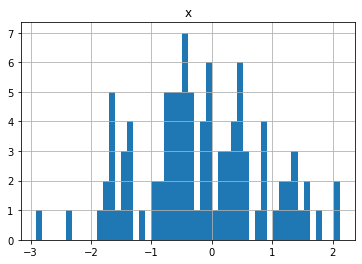

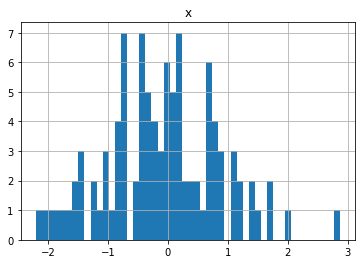

In [6]:
pd.DataFrame({'x': np.random.normal(size = 100)}).hist(bins = 50)
data.hist(bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F396BECF8>]],
      dtype=object)

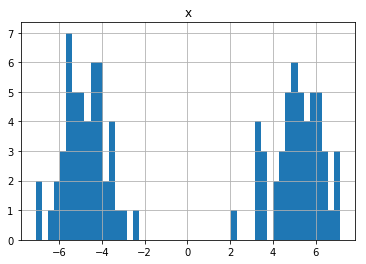

In [16]:
x1 = 5 + np.random.normal(size = 50)
x2 = -5 + np.random.normal(size = 50)
data = pd.DataFrame({'x': np.concatenate((x1, x2))})
data.hist(bins = 50)

In [18]:
data['x'].mean()

0.16063284060545877

In [19]:
stats.ttest_1samp(data['x'], 0.16063284060545877)

Ttest_1sampResult(statistic=-5.981430105208992e-16, pvalue=0.9999999999999996)

两独立样本T检验(两总体方差相等时，即具有方差齐性，可以直接检验）

当不确定两总体方差是否相等时，应先利用levene检验，检验两总体是否具有方差齐性。
如果返回结果的p值远大于0.05，那么我们认为两总体具有方差齐性

In [25]:
stats.levene(x1,x2)

LeveneResult(statistic=0.9620488794645203, pvalue=0.3290864382224974)

In [23]:
stats.ttest_ind(x1,x2)

# if P value < 0.05, the H0 could be rejected, which means x1 is not equal to x2

Ttest_indResult(statistic=46.81689307179705, pvalue=7.150254749524651e-69)

#### Chi Square 卡方检验

若$n$个相互独立的随机变量，均服从标准正态分布，则这$n$个服从标准正态分布的随机变量的平方和构成一新的随机变量，其分布规律称为卡方分布$X^2$

- [卡方检验（Chi-Squared Test）](https://zhuanlan.zhihu.com/p/56423752)
- [卡方检验、T检验+F检验、方差分析、Z检验](https://www.jianshu.com/p/8b7b401881d7)
- [STUDENT’S TEST (T TEST) ](https://researchbasics.education.uconn.edu/t-test/#)

样本的标准差是否高于期望值

In [20]:
x = np.concatenate((x1, x2))

c2dist = stats.chi2(len(x)-1)
sigma = 1
# the distribution of x follows a standard deviation equal to sigma
# P value
c2dist.sf(sum(((x - np.mean(x)/sigma))**2))
# if P value is less than 0.05, it means sigma of x is significantly different from 1

0.0

卡方分析常见的应用——适合度分析

常见的适合度分析的结构如下，一般有两组数据，一组是你统计或者观察到的值，另一组是理论上的预期值。如果这两组值十分接近，证明观测到的结果很“合适”，如果差距较大，则证明观测到的数据不够“合适”，这就是“适合度分析”名字的含义。

这种统计分析在科学研究中是十分常用的，因为科学家经常按照理论预期来推测试验结果，而实际上由于各种误差的存在，实验数据不可能和理论预期完全一致，这时卡方检验就能很好地检验理论的正确性。


**举例**

某科学家预言抛一个色子，各面向上的几率都相同。为了验证自己理论的正确性，该科学家抛了600次硬币，结果为一点102次，二点102次，三点96次，四点105次，五点95次，六点100次。显然这个结果和理论预期并不完全一样，那么，科学家的理论有错吗？

In [22]:
obs = [102, 102, 96, 105, 95, 100]
exp = [100, 100, 100, 100, 100, 100]
stats.chisquare(obs, f_exp = exp)
# If P value > 0.95, we can not reject that obs is significantly different from exp

Power_divergenceResult(statistic=0.74, pvalue=0.980701472519648)

In [21]:
stats.chisquare(x1, f_exp = x2)
# P value to reject H0

Power_divergenceResult(statistic=-1050.4444213168144, pvalue=1.0)

### 最小二乘法（least sqaure method）

最小二乘法的主要思想是通过确定未知参数（通常是一个参数矩阵），来使得真实值和预测值的误差（也称残差）平方和最小

![](https://pic4.zhimg.com/80/v2-03371751ad88764e64216b921f93d403_1440w.jpg)

![](https://pic4.zhimg.com/50/v2-0bbff14fc4305c9f66d84ea5de78beb4_hd.webp?source=1940ef5c)

[最小二乘法解释和Python实现](https://zhuanlan.zhihu.com/p/38128785)

In [9]:
import seaborn
x = np.linspace(-5, 5, 20)
np.random.seed(1)
# normal distributed noise
y = -5 + 3*x + 5 * np.random.normal(size=x.shape)
# Create a data frame containing all the relevant variables
data = pd.DataFrame({'x': x, 'y': y})

<AxesSubplot:xlabel='x', ylabel='y'>

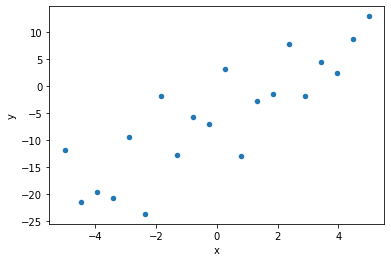

In [10]:
data.plot('x', 'y', kind = 'scatter')

In [11]:
from statsmodels.formula.api import ols

model = ols("y ~ x", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     46.87
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           2.09e-06
Time:                        22:52:24   Log-Likelihood:                -62.451
No. Observations:                  20   AIC:                             128.9
Df Residuals:                      18   BIC:                             130.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.6668      1.295     -4.376      0.0

In [12]:
def simple_ols(y,x):
    import scipy
    x = scipy.c_[np.ones(x.shape[0]),x]
    inv_xx = scipy.linalg.inv(np.dot(x.T,x))
        # b = inv(x.T * x)*x.T*y
    b = np.dot(inv_xx, np.dot(x.T,y)) 
    
    nobs = y.shape[0]                     # number of observations
    ncoef = x.shape[1]                    # number of coef.
    df_e = nobs - ncoef              # degrees of freedom, error 
    df_r = ncoef - 1                      # degrees of freedom, regression 

    e = y - np.dot(x,b)            # residuals
    sse = np.dot(e,e)/df_e         # Sum Squared Error，误差平方和
    se = np.sqrt(np.diagonal(sse*inv_xx))  # coef. standard errors
    
    t = b / se                       # coef. t-statistics
    p = (1-scipy.stats.t.cdf(abs(t), df_e)) * 2    # coef. p-values

    R2 = 1 - e.var()/y.var()         # model R-squared
    R2adj = 1-(1-R2)*((nobs-1)/(nobs-ncoef))   # adjusted R-square

    F = (R2/df_r) / ((1-R2)/df_e)  # model F-statistic
    Fpv = 1-scipy.stats.f.cdf(F, df_r, df_e)  # F-statistic p-value
    res = {'b':b, 'SSE': sse, 'SE': se, 't':t, 'p':p, 'r2':R2, 'r2adj':R2adj, 'F':F, 'Prob(F)': Fpv}
    return res

b = simple_ols(y,x)

In [13]:
b

{'b': array([-5.66682318,  2.92111039]),
 'SSE': 33.53553209075525,
 'SE': array([1.29490409, 0.42667321]),
 't': array([-4.37624935,  6.84624743]),
 'p': array([3.64101866e-04, 2.08848570e-06]),
 'r2': 0.7225266888533326,
 'r2adj': 0.7071115049007399,
 'F': 46.87110391127139,
 'Prob(F)': 2.0884856961611575e-06}

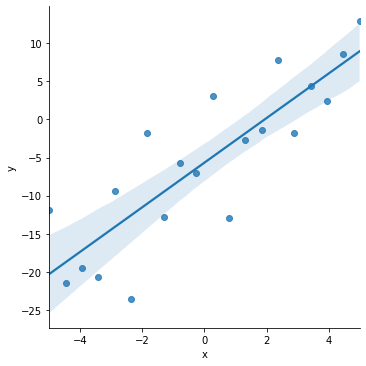

In [14]:
seaborn.lmplot(y='y', x='x', data=data)

In [15]:
# Standard library imports
import urllib.request
import os
import matplotlib.pyplot as plt

import pandas

if not os.path.exists('wages.txt'):
    # Download the file if it is not present
    urllib.request.urlretrieve('http://lib.stat.cmu.edu/datasets/CPS_85_Wages',
                       'wages.txt',engine='python')

# Give names to the columns
names = [
    'EDUCATION: Number of years of education',
    'SOUTH: 1=Person lives in South, 0=Person lives elsewhere',
    'SEX: 1=Female, 0=Male',
    'EXPERIENCE: Number of years of work experience',
    'UNION: 1=Union member, 0=Not union member',
    'WAGE: Wage (dollars per hour)',
    'AGE: years',
    'RACE: 1=Other, 2=Hispanic, 3=White',
    'OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other',
    'SECTOR: 0=Other, 1=Manufacturing, 2=Construction',
    'MARR: 0=Unmarried,  1=Married',
]

short_names = [n.split(':')[0] for n in names]

data = pandas.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None,
                       header=None)
data.columns = short_names

data['WAGE'] = np.log10(data['WAGE'])

<ipython-input-15-88d20c3648c2>:30: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data = pandas.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None,


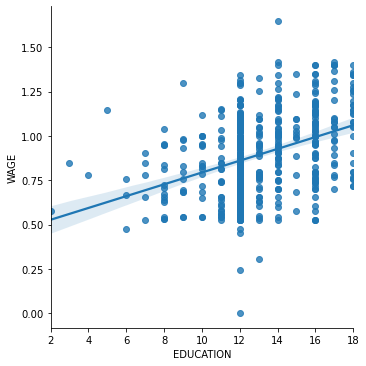

In [16]:
seaborn.lmplot(y='WAGE', x='EDUCATION', data=data)

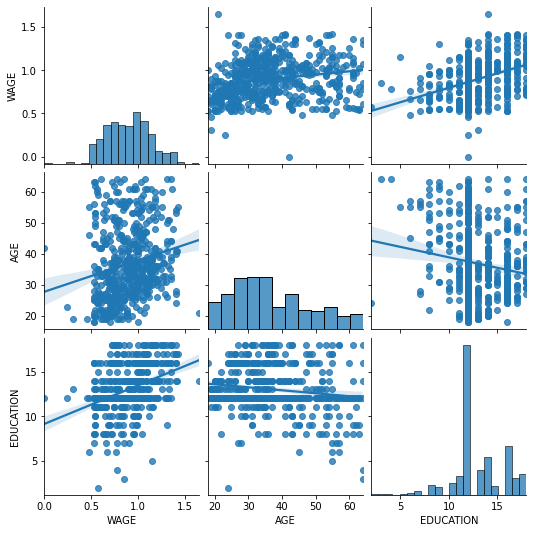

In [17]:
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],kind='reg')

Text(0.5, 0.98, 'Effect of gender: 1=Female, 0=Male')

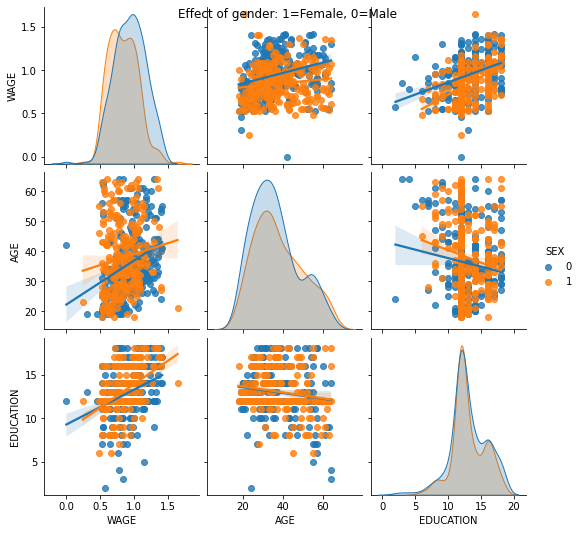

In [18]:
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg', hue='SEX')
plt.suptitle('Effect of gender: 1=Female, 0=Male')

Text(0.5, 0.98, 'Effect of race: 1=Other, 2=Hispanic, 3=White')

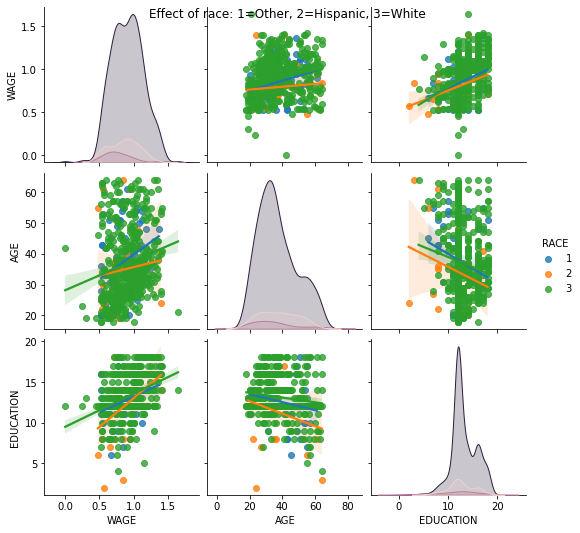

In [19]:
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg', hue='RACE')
plt.suptitle('Effect of race: 1=Other, 2=Hispanic, 3=White')

C:\Users\Administrator\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0.98,'Effect of union: 1=Union member, 0=Not union member')

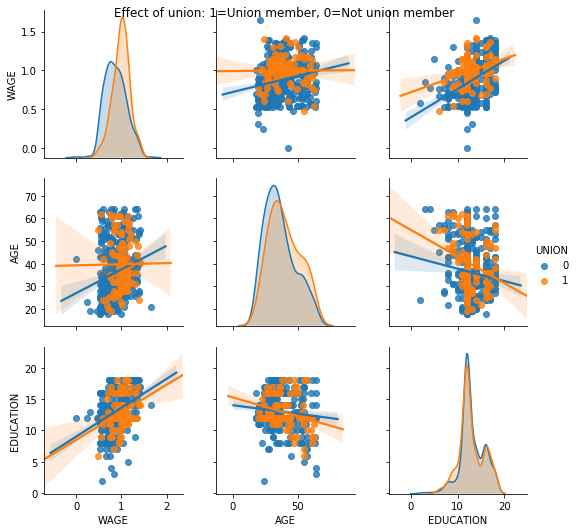

In [61]:
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg', hue='UNION')
plt.suptitle('Effect of union: 1=Union member, 0=Not union member')